In [439]:
import pandas as pd
#from ReliefF import ReliefF
import sklearn_relief as relieff
import numpy as np
import matplotlib.pyplot as plt

Večino spodnjega je obdelava za relif, ker sem poskušal najti najboljše atribute za predvidevanje nesreč

In [440]:
data20 = pd.read_csv('./Podatki/pn2020.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
data19= pd.read_csv('./Podatki/pn2019.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
#odkomenteri za boljše rezultated od relif-a
# data18= pd.read_csv('./Podatki/pn2018.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data17= pd.read_csv('./Podatki/pn2017.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data16= pd.read_csv('./Podatki/pn2016.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data15= pd.read_csv('./Podatki/pn2015.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data14= pd.read_csv('./Podatki/pn2014.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data13= pd.read_csv('./Podatki/pn2013.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data12= pd.read_csv('./Podatki/pn2012.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data11= pd.read_csv('./Podatki/pn2011.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data10= pd.read_csv('./Podatki/pn2010.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data9= pd.read_csv('./Podatki/pn2009.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
#data = pd.concat([data20,data19,data18,data17,data16,data15,data14,data13,data12,data11,data10,data9])
data = pd.concat([data20,data19])
clean_data=data

In [441]:
data.pop("ZaporednaStevilkaPN")
#data.pop("UraPN")
data['UraPN']=data['UraPN'].astype("string")
data['UraPN']=data.UraPN.str.split(".").str[0].astype('int')
data['DatumPN'] = pd.DatetimeIndex(data['DatumPN']).month

Podatki za katere hočemo izvedeti kako vplivajo osatli atributi

In [442]:
data["PoskodbaUdelezenca"]=data.PoskodbaUdelezenca.astype('category').cat.codes
# data.pop("PoskodbaUdelezenca")
data.pop("KlasifikacijaNesrece")
data.pop("GeoKoordinataX")
#data.pop("GeoKoordinataY")
#odkomentiraj, če želiš, da odstrani nan vrednosti
data. dropna()
data.pop("ZaporednaStevilkaOsebeVPN")
data.pop("GeoKoordinataY")

0        394895
1        525311
2        525311
3        500711
4        500711
          ...  
34156    400949
34157    400949
34158    488765
34159    488765
34160    488765
Name: GeoKoordinataY, Length: 60234, dtype: int64

Obedlava vseh atributov, ki jih hočemo v številkah

In [443]:
data['UporabaVarnostnegaPasu']=data.UporabaVarnostnegaPasu.astype('category').cat.codes
data['VrstaUdelezenca']=data.VrstaUdelezenca.astype('category').cat.codes
data['UEStalnegaPrebivalisca']=data.UEStalnegaPrebivalisca.astype('category').cat.codes
data['Spol']=data.Spol.astype('category').cat.codes
data['Drzavljanstvo']=data.Drzavljanstvo.astype('category').cat.codes
data['TekstCesteNaselja']=data.TekstCesteNaselja.astype('category').cat.codes
data['VrstaCesteNaselja']=data.VrstaCesteNaselja.astype('category').cat.codes
data['Lokacija']=data.Lokacija.astype('category').cat.codes
data['VNaselju']=data.VNaselju.astype('category').cat.codes
data['DatumPN']=data.DatumPN.astype('category').cat.codes
data['SifraCesteNaselja']=data.SifraCesteNaselja.astype('category').cat.codes
data['TekstCesteNaselja']=data.TekstCesteNaselja.astype('category').cat.codes
data['TekstOdsekaUlice']=data.TekstOdsekaUlice.astype('category').cat.codes
data['SifraCesteNaselja']=data.SifraCesteNaselja.astype('category').cat.codes
data['SifraOdsekaUlice']=data.SifraOdsekaUlice.astype('category').cat.codes
data['UpravnaEnotaStoritve']=data.UpravnaEnotaStoritve.astype('category').cat.codes
data['VzrokNesrece']=data.VzrokNesrece.astype('category').cat.codes
data['OpisKraja']=data.OpisKraja.astype('category').cat.codes
data['TipNesrece']=data.TipNesrece.astype('category').cat.codes
data['VremenskeOkoliscine']=data.VremenskeOkoliscine.astype('category').cat.codes
data['StanjePrometa']=data.StanjePrometa.astype('category').cat.codes
data['StanjeVozisca']=data.StanjeVozisca.astype('category').cat.codes
data['VrstaVozisca']=data.VrstaVozisca.astype('category').cat.codes
data['Povzrocitelj']=data.Povzrocitelj.astype('category').cat.codes
data['StacionazaDogodka']=data.StacionazaDogodka.astype('category').cat.codes
data['OpisKraja']=data.OpisKraja.astype('category').cat.codes
data['VrednostAlkotesta']=data['VrednostAlkotesta'].str.replace(',','.')
data['VrednostAlkotesta']=data['VrednostAlkotesta'].astype(float)
data['VrednostStrokovnegaPregleda']=data['VrednostStrokovnegaPregleda'].str.replace(',','.')
data['VrednostStrokovnegaPregleda']=data['VrednostStrokovnegaPregleda'].astype(float)
data["VoznStazM"] = data['VozniskiStazVLetih'] * 12 + data['VozniskiStazVMesecih']
data.pop('VozniskiStazVMesecih')
data.pop('VozniskiStazVLetih')

0         8
1        12
2         0
3        16
4        54
         ..
34156     6
34157     0
34158     3
34159     0
34160    37
Name: VozniskiStazVLetih, Length: 60234, dtype: int64

In [444]:
data

,UpravnaEnotaStoritve,DatumPN,UraPN,VNaselju,Lokacija,VrstaCesteNaselja,SifraCesteNaselja,TekstCesteNaselja,SifraOdsekaUlice,TekstOdsekaUlice,...,Starost,Spol,UEStalnegaPrebivalisca,Drzavljanstvo,PoskodbaUdelezenca,VrstaUdelezenca,UporabaVarnostnegaPasu,VrednostAlkotesta,VrednostStrokovnegaPregleda,VoznStazM
0,29,1,20,0,1,6,1465,1607,35,2093,...,26,2,33,72,0,19,2,0.0,0.0,101
1,43,0,12,1,0,9,207,2194,979,1711,...,32,0,19,72,0,19,0,0.0,0.0,153
2,43,0,12,1,0,9,207,2194,979,1711,...,59,0,48,72,3,3,2,0.0,0.0,0
3,57,0,1,1,0,7,53,1492,826,2398,...,38,0,31,72,0,19,0,0.0,0.0,202
4,57,0,1,1,0,7,53,1492,826,2398,...,80,0,31,72,0,19,0,0.0,0.0,659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34156,14,10,21,0,1,6,874,1089,172,393,...,34,0,-1,72,0,19,0,0.0,0.0,80
34157,14,10,21,0,1,6,874,1089,172,393,...,16,0,37,72,3,18,0,0.0,0.0,2
34158,7,7,9,0,1,5,659,3111,0,1538,...,21,0,7,72,3,19,0,0.0,0.0,40
34159,7,7,9,0,1,5,659,3111,0,1538,...,50,2,7,72,3,5,0,0.0,0.0,0


In [445]:

labels=data["PoskodbaUdelezenca"].to_numpy()
data.pop("PoskodbaUdelezenca")
normalized_df=(data-data.mean())/data.std()
x=normalized_df.to_numpy()


In [446]:
r = relieff.Relief(n_features=5) 

my_transformed_matrix = r.fit_transform(x,labels)

In [447]:
atributeScore = r.w_
atributeSorted=[]
for i in range(28):
    atributeSorted.append((data.columns[i],atributeScore[i]))
#     print((data.columns[i],atributeScore[i]))
    
atributeSorted.sort(key=lambda tup: tup[1],reverse=True)
for i in range(28):
    print(atributeSorted[i])

('UraPN', 0.5980423608408653)
('Starost', 0.5704416095336394)
('DatumPN', 0.5365671364032469)
('TekstOdsekaUlice', 0.4610591625621623)
('TipNesrece', 0.4511954687874754)
('UEStalnegaPrebivalisca', 0.4196184091828592)
('VoznStazM', 0.3933407482241727)
('VzrokNesrece', 0.38780116753341043)
('StanjePrometa', 0.3764163560019634)
('UpravnaEnotaStoritve', 0.36661187510858056)
('TekstCesteNaselja', 0.3612024769731794)
('Povzrocitelj', 0.33664813599949384)
('OpisKraja', 0.33373786011983364)
('VrstaUdelezenca', 0.2256261914506991)
('VremenskeOkoliscine', 0.22348226121194192)
('UporabaVarnostnegaPasu', 0.20821521834152018)
('StacionazaDogodka', 0.20286675964236067)
('VrstaVozisca', 0.19406226645257513)
('SifraOdsekaUlice', 0.17056455384245137)
('SifraCesteNaselja', 0.16289023799371807)
('Spol', 0.12909028380812962)
('Drzavljanstvo', 0.1273557012099442)
('StanjeVozisca', 0.09981890384593388)
('VrstaCesteNaselja', 0.0865410886053)
('VrednostAlkotesta', 0.03243913429069899)
('VNaselju', 0.021700667

Z zgornjimi rezultati lahko štejemo vpliv nekega atributa na poškodbo ampak nemoramo zgornje rezultate vzeti kot absolutno za to sem napisal še par funkcij ko naredi heatmap in tabel kjer se prikaže relacija med atributi v tabeli na podalgi pijavitev.

In [501]:
data20 = pd.read_csv('./Podatki/pn2020.csv', delimiter=';', encoding='mbcs', parse_dates=['DatumPN'] ,dayfirst=True)
data19= pd.read_csv('./Podatki/pn2019.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
#odkomentiraj, če želiš še primerjat 
data18= pd.read_csv('./Podatki/pn2018.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data17= pd.read_csv('./Podatki/pn2017.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data16= pd.read_csv('./Podatki/pn2016.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data15= pd.read_csv('./Podatki/pn2015.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data14= pd.read_csv('./Podatki/pn2014.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data13= pd.read_csv('./Podatki/pn2013.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data12= pd.read_csv('./Podatki/pn2012.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data11= pd.read_csv('./Podatki/pn2011.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data10= pd.read_csv('./Podatki/pn2010.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data9= pd.read_csv('./Podatki/pn2009.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
#data = pd.concat([data20,data19,data18,data17,data16,data15,data14,data13,data12,data11,data10,data9])
#data['DatumPN'] = pd.DatetimeIndex(data['DatumPN']).month
data20['DatumPN'] = pd.DatetimeIndex(data20['DatumPN']).month
data19['DatumPN'] = pd.DatetimeIndex(data19['DatumPN']).month
data18['DatumPN'] = pd.DatetimeIndex(data18['DatumPN']).month
data20['UraPN']=data20['UraPN'].astype("string")
data20['UraPN']=data20.UraPN.str.split(".").str[0].astype('int')
data19['UraPN']=data19['UraPN'].astype("string")
data19['UraPN']=data19.UraPN.str.split(".").str[0].astype('int')
# data17['DatumPN'] = pd.DatetimeIndex(data17['DatumPN']).month
data['UraPN']=data['UraPN'].astype("string")
data['UraPN']=data.UraPN.str.split(".").str[0].astype('int')
data['VrednostAlkotesta']=data['VrednostAlkotesta'].astype("string")
data['VrednostAlkotesta']=data['VrednostAlkotesta'].str.replace(',','.')
data['VrednostAlkotesta']=data['VrednostAlkotesta'].astype(float)
data19["VoznStazM"] = data19['VozniskiStazVLetih'] * 12 + data19['VozniskiStazVMesecih']
data19.pop('VozniskiStazVMesecih')
data19.pop('VozniskiStazVLetih')

0         0
1         0
2        29
3        58
4        26
         ..
34156     6
34157     0
34158     3
34159     0
34160    37
Name: VozniskiStazVLetih, Length: 34161, dtype: int64

In [502]:
def makeTableOfOccurences(col1,col2,df):
    out = df[col1].to_frame(col1).join(df[col2]).assign(value=1)
    out = out.pivot_table('value', col1, col2, aggfunc='count', fill_value=0)
    out = out.assign(Count=lambda x: x.sum(axis=1))
    return out

In [503]:
def makeHeatMapFromRow(rowIndex,table):
    fig, ax = plt.subplots(figsize=(14,8)) 


    im = ax.imshow(tabelaRelacij.iloc[[rowIndex]], origin='upper', aspect='auto', interpolation='None')

    fig.colorbar(im, ax=ax, label="opis barvne lestvice")
    
    ax.set_title("Graf relacij ")
    
def makeHeatMapBetween(StartRowIndex,EndRowIndex,table):
    fig, ax = plt.subplots(figsize=(14,8)) 

    rows_between = table.iloc[int(StartRowIndex):int(EndRowIndex)]
    im = ax.imshow(rows_between, origin='upper', aspect='auto', interpolation='None')

    fig.colorbar(im, ax=ax, label="opis barvne lestvice")
    
    ax.set_title("Graf relacij ")
    

Text(0, 0.5, 'Ura nesreče')

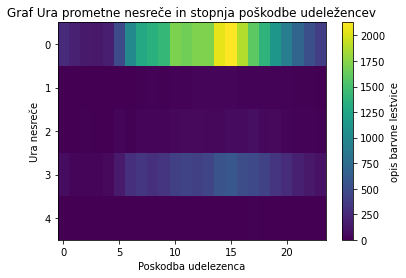

In [549]:
tabelaRelacij=makeTableOfOccurences("PoskodbaUdelezenca","UraPN",data19)
fig, ax = plt.subplots() 

tabelaRelacij.pop("Count")
im = ax.imshow(tabelaRelacij, origin='upper', aspect='auto', interpolation='None')

fig.colorbar(im, ax=ax, label="opis barvne lestvice")
ax.set_title("Graf Ura prometne nesreče in stopnja poškodbe udeležencev")
ax.set_xlabel("Poskodba udelezenca")
ax.set_ylabel("Ura nesreče")

Text(0, 0.5, 'starost udeleženca')

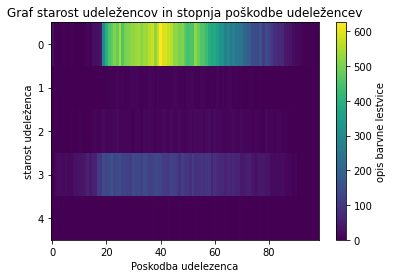

In [550]:
tabelaRelacij=makeTableOfOccurences("PoskodbaUdelezenca","Starost",data19)
tabelaRelacij.pop("Count")
#pregled vizualni pregled nad vsemi atributi
fig, ax = plt.subplots() 


im = ax.imshow(tabelaRelacij, origin='upper', aspect='auto', interpolation='None')

fig.colorbar(im, ax=ax, label="opis barvne lestvice")
ax.set_title("Graf starost udeležencov in stopnja poškodbe udeležencev")
ax.set_xlabel("Poskodba udelezenca")
ax.set_ylabel("starost udeleženca")

Text(0.5, 1.0, 'Graf Ura prometne nesreče in stopnja poškodbe udeležencev')

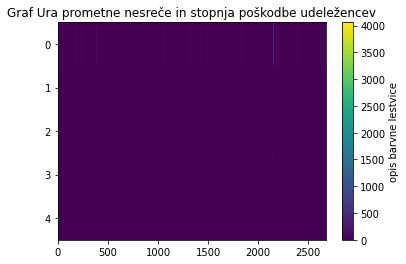

In [545]:
#ta graf je neuporaben
tabelaRelacij=makeTableOfOccurences("PoskodbaUdelezenca","TekstOdsekaUlice",data19)
tabelaRelacij.pop("Count")
fig, ax = plt.subplots() 

im = ax.imshow(tabelaRelacij, origin='upper', aspect='auto', interpolation='None')

fig.colorbar(im, ax=ax, label="opis barvne lestvice")
ax.set_title("Graf Ura prometne nesreče in stopnja poškodbe udeležencev")

Text(0, 0.5, 'starost udeleženca')

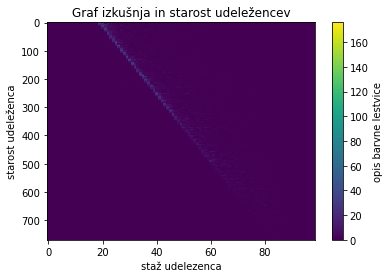

In [551]:
tabelaRelacij=makeTableOfOccurences("VoznStazM","Starost",data19)
tabelaRelacij.pop("Count")
fig, ax = plt.subplots() 

im = ax.imshow(tabelaRelacij, origin='upper', aspect='auto', interpolation='None')

fig.colorbar(im, ax=ax, label="opis barvne lestvice")
ax.set_title("Graf izkušnja in starost udeležencev")
ax.set_xlabel("staž udelezenca")
ax.set_ylabel("starost udeleženca")

In [552]:
tabelaRelacij=makeTableOfOccurences("UporabaVarnostnegaPasu","PoskodbaUdelezenca",data19)
tabelaRelacij.pop("Count")

UporabaVarnostnegaPasu
DA         27070
NE          3032
NEZNANO     3975
Name: Count, dtype: int64

In [553]:
tabelaRelacij

PoskodbaUdelezenca,BREZ POŠKODBE,BREZ POŠKODBE-UZ,HUDA TELESNA POŠKODBA,LAŽJA TELESNA POŠKODBA,SMRT
UporabaVarnostnegaPasu,,,,,
DA,21060,205,489,5260,56
NE,1745,68,251,932,36
NEZNANO,3166,88,80,631,10


Text(0.5, 1.0, 'Graf udeleženci, ki niso so uporabljali varnostni pas in njihove poškodbe')

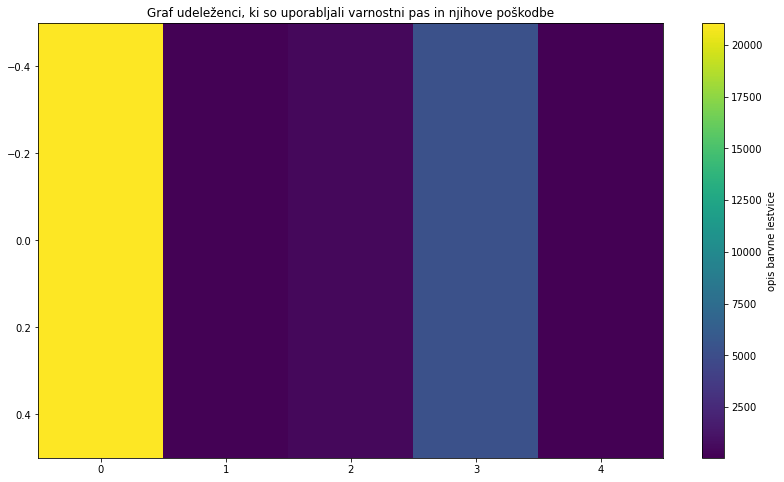

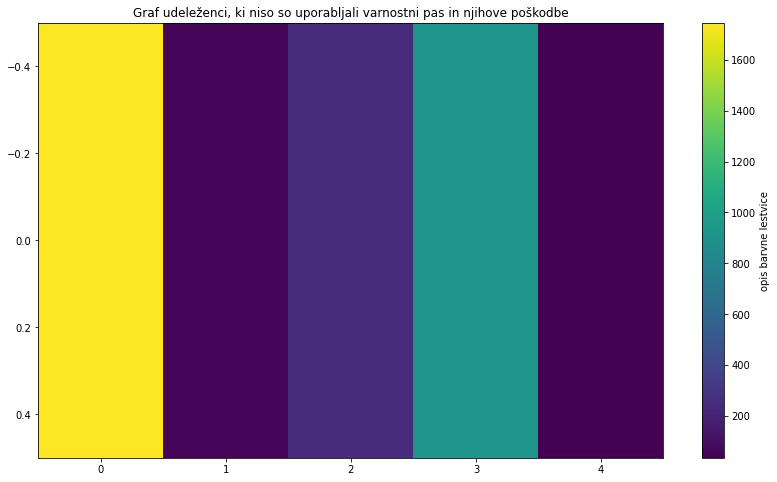

In [541]:
fig, ax = plt.subplots(figsize=(14,8)) 


im = ax.imshow(tabelaRelacij.iloc[[0],0] ,igin='upper', aspect='auto', interpolation='None')

fig.colorbar(im, ax=ax, label="opis barvne lestvice")
    
ax.set_title("Graf udeleženci, ki so uporabljali varnostni pas in njihove poškodbe")

ax.set_xlabel("Poskodba udelezenca")

fig, ax = plt.subplots(figsize=(14,8)) 

im = ax.imshow(tabelaRelacij.iloc[[1]], origin='upper', aspect='auto', interpolation='None')

fig.colorbar(im, ax=ax, label="opis barvne lestvice")
    
ax.set_title("Graf udeleženci, ki niso so uporabljali varnostni pas in njihove poškodbe")